In [ ]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/SDPProject/onlinefraud.csv"
dataset=pd.read_csv(path)

In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Text(0, 0.5, 'Frequency')

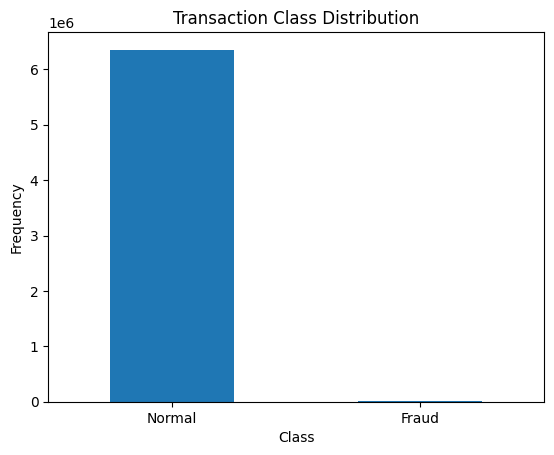

In [ ]:
Fraud = dataset[dataset['isFraud'] == 1]
Normal = dataset[dataset['isFraud'] == 0]

# count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes = pd.Series(dataset['isFraud']).value_counts(sort=True)

count_classes.plot(kind='bar', rot=0)

plt.title("Transaction Class Distribution")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 3
Float variables: 5


In [ ]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='type', ylabel='amount'>

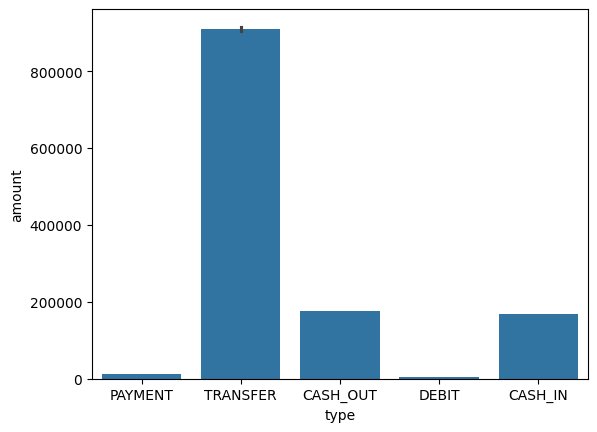

In [ ]:
sns.barplot(x='type', y='amount',data=dataset)


In [ ]:
dataset['isFraud'].value_counts()


,count
isFraud,
0,6354407
1,8213


<Axes: >

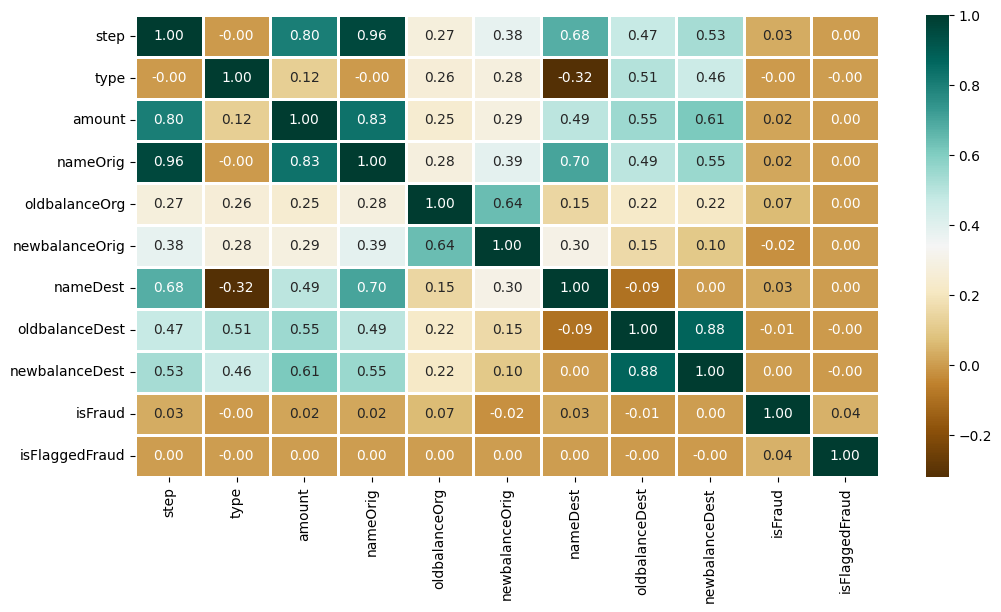

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.apply(lambda x: pd.factorize(x)[0]).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


In [ ]:
type_new = pd.get_dummies(dataset['type'], drop_first=True)
data_new = pd.concat([dataset, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [ ]:
X.shape, y.shape


((6362620, 11), (6362620,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
# Initialize the SGDClassifier with logistic loss function for classification
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

# Train the model using the scaled training data
sgd_model.fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss')

In [ ]:
# Predict on the test set
y_pred = sgd_model.predict(X_test_scaled)
# Predict probabilities for ROC AUC
y_proba = sgd_model.predict_proba(X_test_scaled)[:, 1]
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9988
Precision: 0.9773
Recall: 0.0883
F1 Score: 0.1620
ROC AUC Score: 0.9341


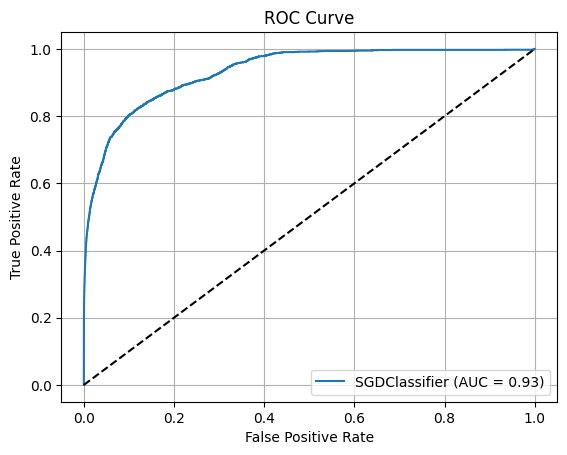

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"SGDClassifier (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(f"Original dataset class distribution:\n{y_train.value_counts()}")
print(f"Resampled dataset class distribution:\n{y_train_resampled.value_counts()}")

Original dataset class distribution:
isFraud
0    4448056
1       5778
Name: count, dtype: int64
Resampled dataset class distribution:
isFraud
0    4448056
1    4448056
Name: count, dtype: int64


In [ ]:
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = sgd_model.predict(X_test_scaled)
y_proba = sgd_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.9324
Precision: 0.0170
Recall: 0.9166
F1 Score: 0.0335
ROC AUC Score: 0.9816


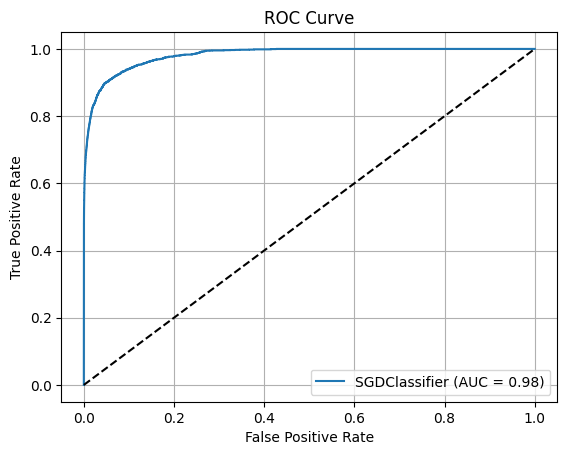

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'SGDClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
# predictions
yPred = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)[:, 1]

In [ ]:
n_outliers = y_test.sum()
n_errors = (yPred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score: {:.4f}".format(roc_auc))

The model used is Random Forest classifier
The accuracy is 0.9996374659076502
The precision is 0.9937677053824363
The recall is 0.7203285420944558
The F1-Score is 0.8352380952380952
The Matthews correlation coefficient is0.8459174190512312
ROC AUC Score: 0.9966


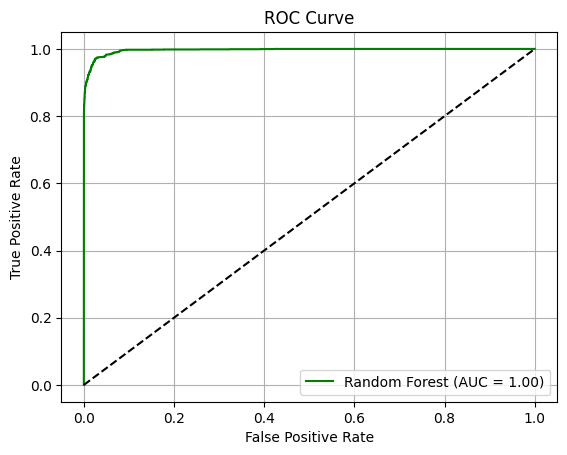

In [ ]:
# 5. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:

# 1. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Train Random Forest model
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# 3. Predictions
yPred = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)[:, 1]  # Positive class probabilities

# 4. Metrics
n_outliers = y_test.sum()
n_errors = (yPred != y_test).sum()

print("The model used is Random Forest Classifier with SMOTE")
print("Number of true positive samples (outliers):", n_outliers)
print("Number of prediction errors:", n_errors)

acc = accuracy_score(y_test, yPred)
prec = precision_score(y_test, yPred)
rec = recall_score(y_test, yPred)
f1 = f1_score(y_test, yPred)
mcc = matthews_corrcoef(y_test, yPred)
roc_auc = roc_auc_score(y_test, y_proba)

# 5. Print Scores
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(rec))
print("F1 Score: {:.4f}".format(f1))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))
print("ROC AUC Score: {:.4f}".format(roc_auc))

The model used is Random Forest Classifier with SMOTE
Number of true positive samples (outliers): 2435
Number of prediction errors: 29756
Accuracy: 0.9844
Precision: 0.0749
Recall: 0.9881
F1 Score: 0.1392
Matthews Correlation Coefficient: 0.2698
ROC AUC Score: 0.9984


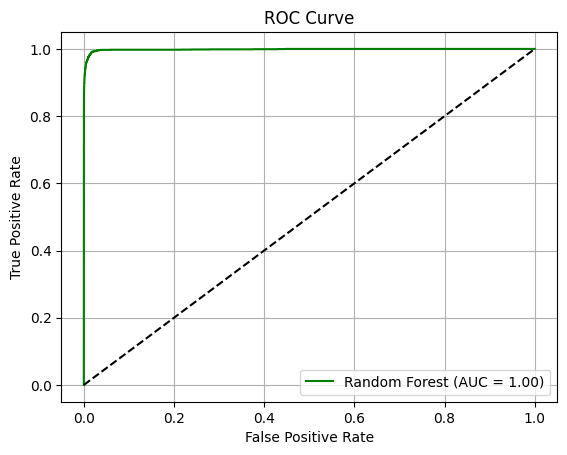

In [ ]:
# 6. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Reshape: (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 232s 4ms/step - accuracy: 0.9964 - loss: 0.0151 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 2/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 244s 4ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 3/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 213s 4ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 4/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 223s 4ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 5/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 212s 4ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 6/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 211s 4ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 7/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 221s 4ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 260s 4ms/step - ac

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_rnn).reshape(-1)
y_pred = (y_pred_probs > 0.5).astype(int)


59650/59650 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)


print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


Accuracy : 0.9995
Precision: 0.9595
Recall   : 0.6320
F1 Score : 0.7621
ROC AUC  : 0.9954


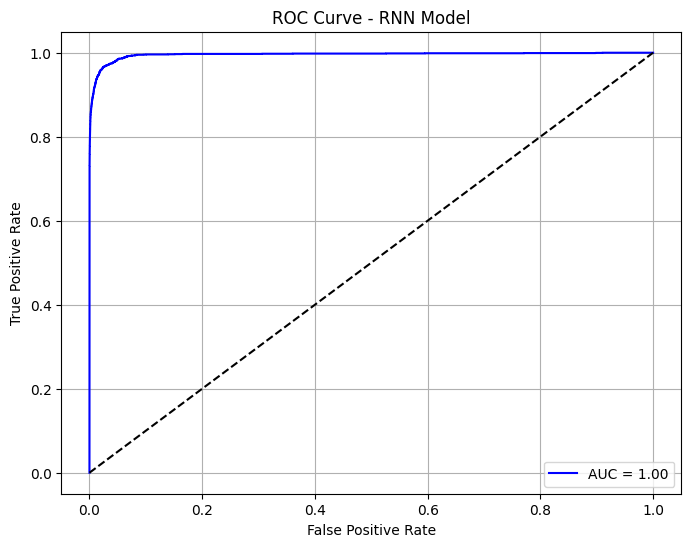

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Apply SMOTE before reshaping
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Reshape to RNN input: (samples, timesteps, features)
X_train_rnn = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train_smote, epochs=10, batch_size=64, validation_split=0.2)

# Predictions
y_pred_probs = model.predict(X_test_rnn).reshape(-1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Output
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 326s 3ms/step - accuracy: 0.9566 - loss: 0.1088 - val_accuracy: 0.9708 - val_loss: 0.0919
Epoch 2/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 412s 3ms/step - accuracy: 0.9824 - loss: 0.0539 - val_accuracy: 0.9909 - val_loss: 0.0537
Epoch 3/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 318s 3ms/step - accuracy: 0.9844 - loss: 0.0485 - val_accuracy: 0.9888 - val_loss: 0.0535
Epoch 4/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 354s 3ms/step - accuracy: 0.9856 - loss: 0.0448 - val_accuracy: 0.9884 - val_loss: 0.0538
Epoch 5/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 353s 3ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9940 - val_loss: 0.0372
Epoch 6/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 384s 3ms/step - accuracy: 0.9871 - loss: 0.0396 - val_accuracy: 0.9761 - val_loss: 0.0737
Epoch 7/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 381s 3ms/step - accuracy: 0.9878 - loss: 0.0373 - val_accuracy: 0.9893 - val_loss: 0.0435
Epoch 8/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 38

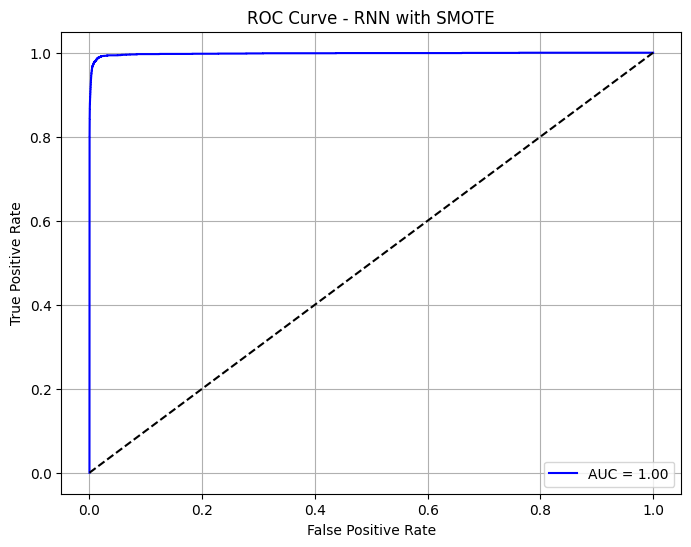

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN with SMOTE')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Reshape data
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 198s 4ms/step - accuracy: 0.9987 - loss: 0.0145 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 2/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 211s 4ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 3/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 242s 3ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 4/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 219s 4ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 5/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 247s 3ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 6/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 191s 3ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 7/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 191s 3ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 8/10
55673/55673 ━━━━━━━━━━━━━━━━━━━━ 216s 4ms/step - ac

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_lstm).reshape(-1)

# Binary predictions using 0.5 threshold
y_pred = (y_pred_probs > 0.5).astype(int)


59650/59650 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


Accuracy : 0.9995
Precision: 0.9803
Recall   : 0.6345
F1 Score : 0.7704
ROC AUC  : 0.9945


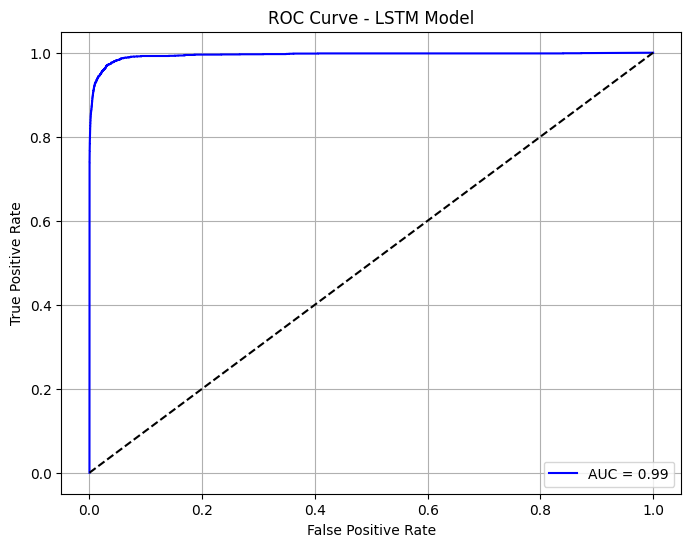

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Apply SMOTE
# ------------------------
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Reshape for LSTM input: (samples, timesteps, features)
X_train_lstm = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
# Estimate class weights automatically (optional)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train_smote)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_smote)
class_weights = dict(zip(classes, weights))


In [ ]:

# ------------------------
# Build LSTM model
# ------------------------
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Binary output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ------------------------
# Train the model
# ------------------------
history = model.fit(X_train_lstm, y_train_smote, epochs=10, batch_size=64, validation_split=0.2,class_weight=class_weights)

# ------------------------
# Predict and Evaluate
# ------------------------
y_pred_probs = model.predict(X_test_lstm).reshape(-1)
y_pred = (y_pred_probs > 0.7).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# ------------------------
# Print Results
# ------------------------
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 469s 4ms/step - accuracy: 0.9648 - loss: 0.0917 - val_accuracy: 0.9709 - val_loss: 0.0765
Epoch 2/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 530s 4ms/step - accuracy: 0.9879 - loss: 0.0363 - val_accuracy: 0.9917 - val_loss: 0.0410
Epoch 3/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 457s 4ms/step - accuracy: 0.9900 - loss: 0.0300 - val_accuracy: 0.9746 - val_loss: 0.0814
Epoch 4/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 459s 4ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9952 - val_loss: 0.0246
Epoch 5/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 539s 4ms/step - accuracy: 0.9915 - loss: 0.0258 - val_accuracy: 0.9924 - val_loss: 0.0277
Epoch 6/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 481s 4ms/step - accuracy: 0.9918 - loss: 0.0246 - val_accuracy: 0.9950 - val_loss: 0.0222
Epoch 7/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 489s 4ms/step - accuracy: 0.9922 - loss: 0.0236 - val_accuracy: 0.9951 - val_loss: 0.0181
Epoch 8/10
111202/111202 ━━━━━━━━━━━━━━━━━━━━ 47

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# y_test: actual labels
# y_pred: predicted labels (make sure they are binary: 0 or 1)
# If you have probabilities from model.predict(), threshold them:
# y_pred = (y_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert to pandas DataFrame for better display
cm_df = pd.DataFrame(cm,
                     index=['Actual: Non-Fraud (0)', 'Actual: Fraud (1)'],
                     columns=['Predicted: Non-Fraud (0)', 'Predicted: Fraud (1)'])

# Display
print("Confusion Matrix (LSTM + SMOTE):")
print(cm_df)


Confusion Matrix (LSTM + SMOTE):
                       Predicted: Non-Fraud (0)  Predicted: Fraud (1)
Actual: Non-Fraud (0)                   1900373                  5978
Actual: Fraud (1)                            74                  2361


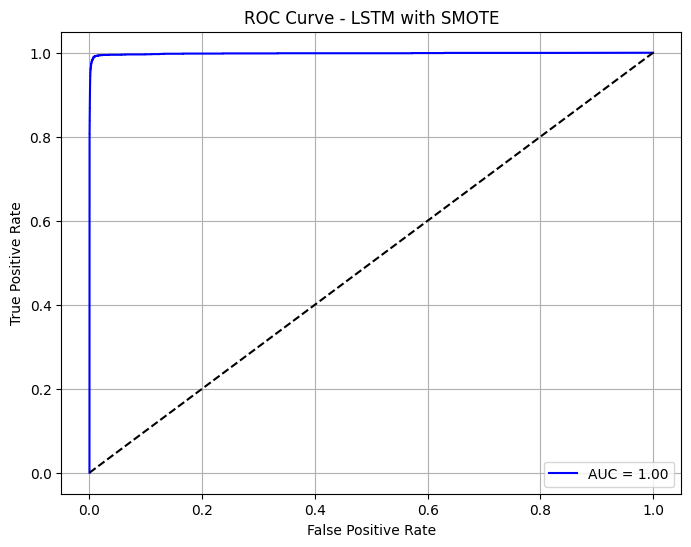

In [ ]:
# ROC Curve Plot
# ------------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM with SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

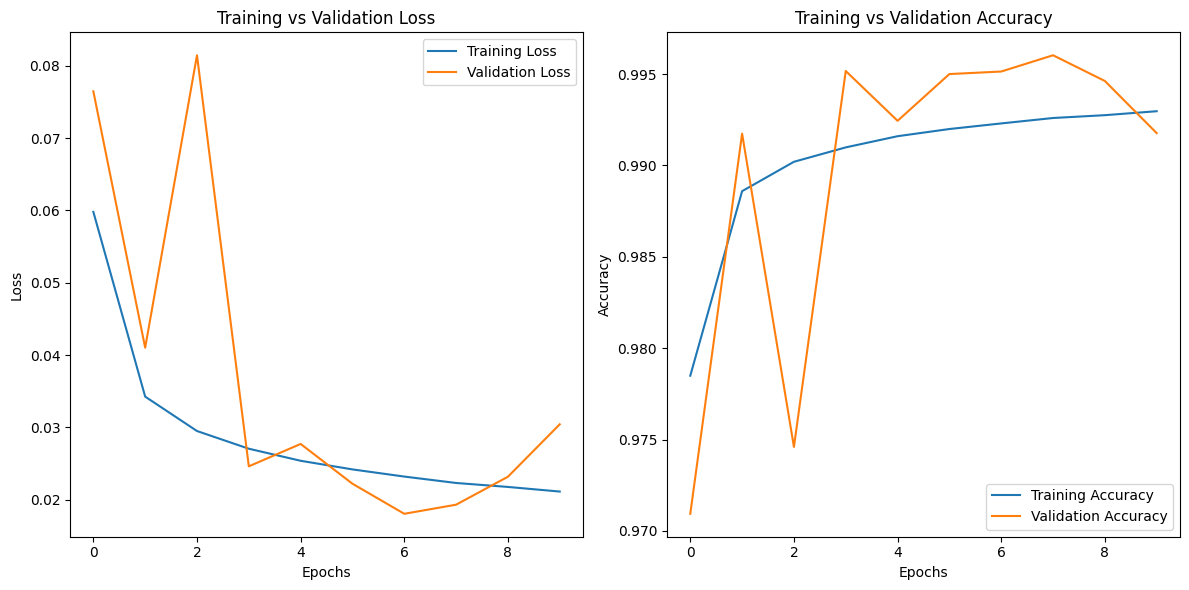

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()